# Comparison of Regressors for Abalone Age Prediction

## The dataset

### What is the purpose of the dataset? 

The purpose of this dataset is to predict the age of the Abalone, based of physical measurements.

### What are the features

The dataset contains 8 features. These features are the different measurement done on these Abalones. These physical measurement are Sex, length, diameter, height, whole weight, shucked weight, viscera weight and shell weight.

### What is the target?

The target is the age of the of the abalone. The target is a continous variable, representing age in years. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
coloumn_names = ['Sex',
               'Length',
               'Diameter',
               'Height',
               'Whole weight',
               'Shucked weight',
               'Viscera weight',
               'Shell weight',
               'Rings'
               ]

In [4]:
dataset = pd.read_csv('abalone.data', sep=",", header=None)
dataset.columns = coloumn_names
dataset['Sex'] = dataset['Sex'].map({'M': 0, 'F': 1, 'I':2})
dataset.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


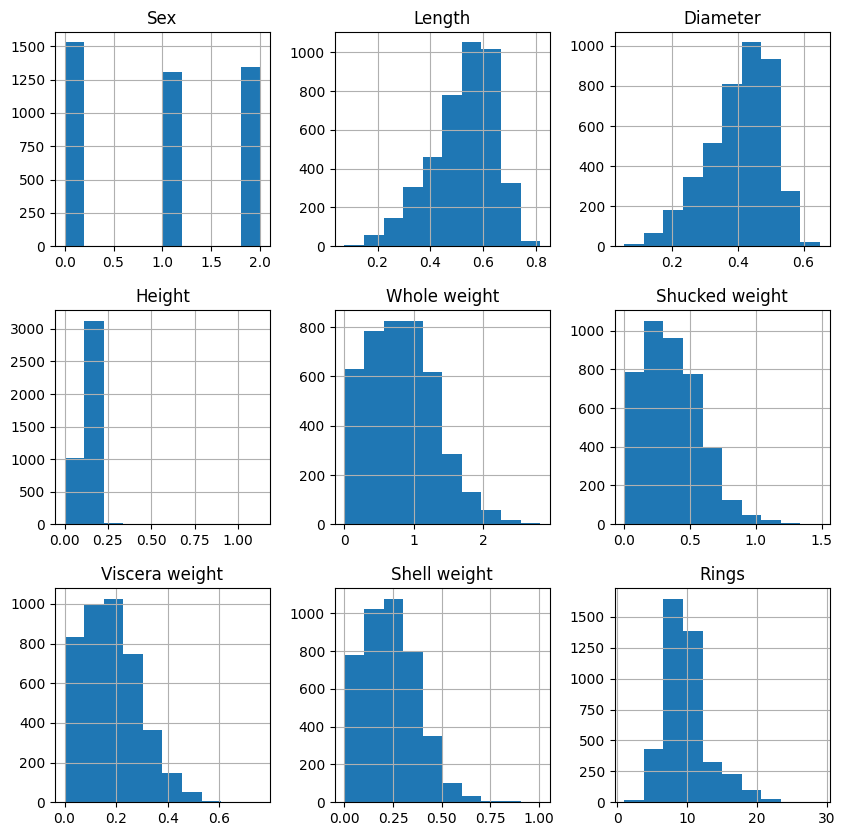

In [34]:
dataset.hist(figsize=(10,10));

In [6]:
#dataset_onehot = pd.get_dummies(dataset,columns=dataset['Sex'])
#dataset_onehot = pd.concat([dataset, pd.get_dummies(dataset['Sex'])], axis=1)
#dataset_onehot.drop('Sex', axis=1, inplace=True)
#dataset_onehot = pd.get_dummies(dataset, columns=['Sex'])

#dataset_onehot.head()

In [5]:
features = dataset.drop('Rings', axis=1)
targets = dataset['Rings']

## Creating the split.

Chosen a 80/20 split. This split was is to have most of the data in the training, putting 80% in the training and leaving 20% for the testing. 

In [ ]:
trainval_features, test_features, trainval_targets, test_targets = train_test_split(features, targets, test_size=0.2)

## Evaluate function

In [68]:
def evaluate(model):
    predictions_train = model.predict(trainval_features)

    print(f"Train R2: {r2_score(trainval_targets, predictions_train)}")
    print(f"Train MSE: {mean_squared_error(trainval_targets, predictions_train)}")
    print(f"Train MAE: {mean_absolute_error(trainval_targets, predictions_train)}")
    print()

    predictions_test = model.predict(test_features)
    print()
    print(f"Test R2: {r2_score(test_targets, predictions_test)}")
    print(f"Test MSE: {mean_squared_error(test_targets, predictions_test)}")
    print(f"Test MAE: {mean_absolute_error(test_targets, predictions_test)}")

## Creating grid search function

In [10]:
def train_grid_search(classifier, parameter_grid,scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit= refit, 
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [11]:
metrics_regressor = ['r2','neg_mean_squared_error' ,'neg_mean_absolute_error' ]


param_grid_RF_regressor = {
    'max_depth': np.arange(2, 31, 5),           
    'n_estimators': np.arange(50, 501, 50),   
    'min_samples_split': np.arange(2, 11, 2),  
}

param_grid_GB_regressor = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }

param_grid_DT_regressor = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}


## Grid search on RF

In [12]:
train_grid_search(RandomForestRegressor(),param_grid_RF_regressor,metrics_regressor,'r2',trainval_features,trainval_targets)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best parameters: {'max_depth': np.int64(12), 'min_samples_split': np.int64(10), 'n_estimators': np.int64(450)}
best score: 0.5538


(RandomForestRegressor(max_depth=np.int64(12), min_samples_split=np.int64(10),
                       n_estimators=np.int64(450)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.219755      0.054564         0.009671        0.004004   
 1         0.316389      0.008556         0.008569        0.001150   
 2         0.465223      0.024476         0.011726        0.001916   
 3         0.613714      0.031303         0.012875        0.000866   
 4         0.774522      0.033009         0.015994        0.002473   
 ..             ...           ...              ...             ...   
 295       3.650084      0.040408         0.038127        0.002926   
 296       4.404279      0.068523         0.046575        0.001455   
 297       4.929505      0.026849         0.049881        0.001608   
 298       5.434478      0.039373         0.051678        0.003144   
 299       5.758833      0.102702         0.053731        0.003055   
 
      param_max_depth  para

In [69]:
random_forest_regressor = RandomForestRegressor(max_depth=12,min_samples_split=8,n_estimators=400)
random_forest_regressor.fit(trainval_features,trainval_targets)
evaluate(random_forest_regressor)


Train R2: 0.8436593440967252
Train MSE: 1.6078031902444392
Train MAE: 0.9209407416273913


Test R2: 0.5420396569173214
Test MSE: 4.957516906405602
Test MAE: 1.5628132819840144


## Grid search on GBR

In [14]:
train_grid_search(GradientBoostingRegressor(),param_grid_GB_regressor,metrics_regressor,'r2',trainval_features,trainval_targets)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
best parameters: {'learning_rate': np.float64(0.11), 'loss': 'huber', 'max_depth': np.int64(3), 'n_estimators': np.int64(200)}
best score: 0.5554


(GradientBoostingRegressor(learning_rate=np.float64(0.11), loss='huber',
                           max_depth=np.int64(3), n_estimators=np.int64(200)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.246443      0.011908         0.004075        0.004136   
 1         0.484154      0.018617         0.004938        0.004090   
 2         0.719558      0.016579         0.002012        0.004023   
 3         0.922381      0.015956         0.005235        0.003250   
 4         0.376823      0.012762         0.002107        0.002581   
 ..             ...           ...              ...             ...   
 315       2.743467      0.071615         0.004829        0.001813   
 316       1.062819      0.038485         0.005283        0.001665   
 317       1.914687      0.040862         0.005001        0.001407   
 318       2.605816      0.077399         0.004503        0.000780   
 319       3.125202      0.125553         0.004381        0.000383   
 
      

In [70]:
gradient_booster_regressor = GradientBoostingRegressor(learning_rate=0.11,max_depth=3,loss='huber',n_estimators=200)
gradient_booster_regressor.fit(trainval_features, trainval_targets)
evaluate(gradient_booster_regressor)

Train R2: 0.700778698281752
Train MSE: 3.077183991023641
Train MAE: 1.2117780392509279


Test R2: 0.5232760860773009
Test MSE: 5.1606365019535225
Test MAE: 1.556452225247883


In [71]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(trainval_features, trainval_targets)
evaluate(linear_regression_model)

Train R2: 0.5331708151519303
Train MSE: 4.800859049499582
Train MAE: 1.5811550493173565


Test R2: 0.5427053625654411
Test MSE: 4.950310502936191
Test MAE: 1.606760859825025


## Grid search on DTR

In [17]:
train_grid_search(DecisionTreeRegressor(),param_grid_DT_regressor,metrics_regressor,'r2',trainval_features,trainval_targets,cv=5)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
best parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
best score: 0.4818


(DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50,
                       min_impurity_decrease=0.01, min_samples_split=5,
                       splitter='random'),
       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0          0.021440      0.000399         0.002876        0.000503   
 1          0.007507      0.000724         0.003096        0.000443   
 2          0.020311      0.000585         0.002732        0.000560   
 3          0.006816      0.000470         0.002675        0.000258   
 4          0.018477      0.000494         0.003062        0.000314   
 ...             ...           ...              ...             ...   
 5179       0.022708      0.007724         0.001602        0.001020   
 5180       0.055037      0.004812         0.002173        0.000494   
 5181       0.022607      0.007460         0.001703        0.000597   
 5182       0.053044      0.007414         0.001931        0.000379   
 5183       0.024234      0.006809         0.002

In [72]:
decision_tree_regressor = DecisionTreeRegressor(criterion='squared_error',max_depth=None,max_features=None,max_leaf_nodes=50,min_impurity_decrease=0.1,min_samples_leaf=5, min_samples_split=10,splitter='random')
decision_tree_regressor.fit(trainval_features, trainval_targets)
evaluate(decision_tree_regressor)

Train R2: 0.3916233874637173
Train MSE: 6.256529070155009
Train MAE: 1.8296879007685476


Test R2: 0.3971397438868637
Test MSE: 6.526088900543329
Test MAE: 1.8693918108585403


# The results

### Random forest 

- Train R2: 0.8436593440967252
- Train MSE: 1.6078031902444392
- Train MAE: 0.9209407416273913


- Test R2: 0.5420396569173214
- Test MSE: 4.957516906405602
- Test MAE: 1.5628132819840144

### Gradient booster

- Train R2: 0.700778698281752
- Train MSE: 3.077183991023641
- Train MAE: 1.2117780392509279


- Test R2: 0.5232760860773009
- Test MSE: 5.1606365019535225
- Test MAE: 1.556452225247883

### Linear regressor

- Train R2: 0.5331708151519303
- Train MSE: 4.800859049499582
- Train MAE: 1.5811550493173565 


- Test R2: 0.5427053625654411
- Test MSE: 4.950310502936191
- Test MAE: 1.606760859825025

### Decision tree regressor

- Train R2: 0.3916233874637173
- Train MSE: 6.256529070155009
- Train MAE: 1.8296879007685476


- Test R2: 0.3971397438868637
- Test MSE: 6.526088900543329
- Test MAE: 1.8693918108585403

## Conclusion

- The random forest model gave the best results compared to the other models in both training and testing. 
- The gradient booster was the secound best performer with training, but did not perform as well as linear regressor in the tests. 
- The decision tree performed worst in both training and testing compared to the other models. 


## Visualizing the models

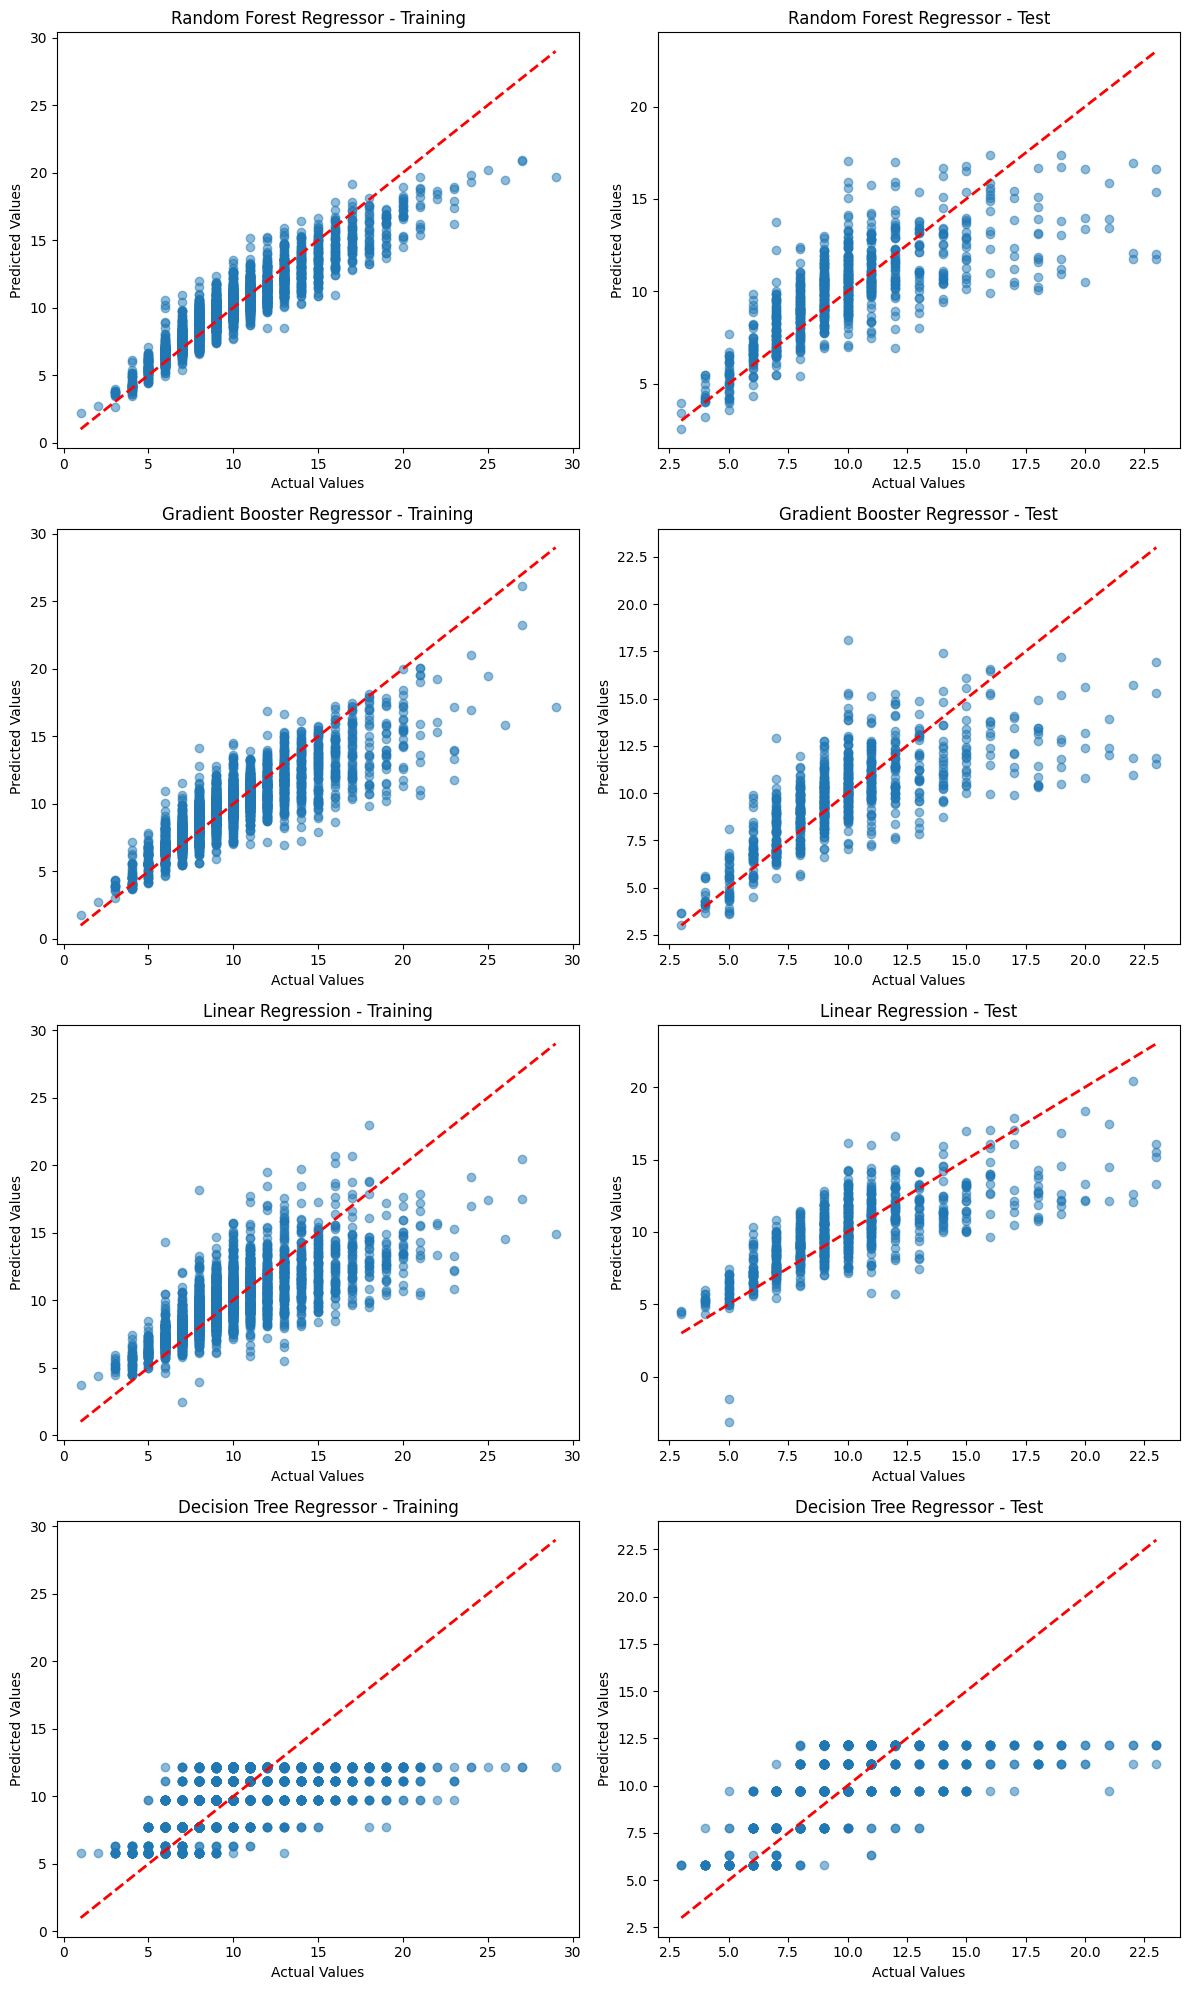

In [43]:
def plot_actual_vs_predicted(actual, predicted, set_name, ax):
    ax.scatter(actual, predicted, alpha=0.5)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{set_name}")


models = {
    "Random Forest Regressor": random_forest_regressor,
    "Gradient Booster Regressor": gradient_booster_regressor,
    "Linear Regression": linear_regression_model,
    "Decision Tree Regressor": decision_tree_regressor
}


predictions = {}


for model_name, model in models.items():
    predictions[model_name] = {
        "train": model.predict(trainval_features),
        "test": model.predict(test_features)
    }


fig, axs = plt.subplots(len(models), 2, figsize=(12, 5 * len(models)))
axs = axs if len(models) > 1 else [axs]  

for idx, (model_name, preds) in enumerate(predictions.items()):
  
    plot_actual_vs_predicted(trainval_targets, preds["train"], f"{model_name} - Training", axs[idx][0])
    plot_actual_vs_predicted(test_targets, preds["test"], f"{model_name} - Test", axs[idx][1])

plt.tight_layout()
plt.show()


# Neural networks

In [9]:
import tensorflow as tf

from keras.src.layers import Input, Dense, Dropout, Flatten, Softmax, BatchNormalization
from keras.src.models import Sequential
from keras.src.callbacks import Callback
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.src.optimizers import Adam, SGD, RMSprop


## Finding the amount of input neurons

In [20]:
trainval_features.shape

(3341, 8)

## Creating model tuner and grid search function

In [49]:
def create1(drop_out):
    model = Sequential([
        Input(shape=(8,)),

        Dense(16, activation='sigmoid'),
        Dropout(drop_out),
        Dense(8, activation='sigmoid'),
        Dropout(drop_out),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error','r2_score','mean_absolute_error'])
    return model


regressor = KerasRegressor(create1, drop_out=0.1, epochs=10, batch_size=32)

params = {'drop_out':[0.1, 0.2, 0.3],
          'epochs':[10, 20, 30],
          'batch_size': [16,24,32]}

grid = GridSearchCV(regressor, params)
grid.fit(trainval_features, trainval_targets);


print(grid.best_params_)
print(grid.best_score_)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 92.6609 - mean_absolute_error: 9.0624 - mean_squared_error: 92.6609 - r2_score: -8.2006
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 60.7026 - mean_absolute_error: 7.0849 - mean_squared_error: 60.7026 - r2_score: -4.9645
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 42.5248 - mean_absolute_error: 5.6865 - mean_squared_error: 42.5248 - r2_score: -3.2350
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 32.5394 - mean_absolute_error: 4.7044 - mean_squared_error: 32.5394 - r2_score: -1.9616
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 24.1297 - mean_absolute_error: 3.8067 - mean_squared_error: 24.1297 - r2_score: -1.2014
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.0054 - mean_absolute_error: 3.2865 - mean_squared_error: 19.0054 - r2_score: -0.8810  
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 16.6134 - mean_absolute_error: 2.9731 - 

In [64]:
regressor0 = KerasRegressor(create1, drop_out=0.1, epochs=30, batch_size=16)
regressor0.fit(trainval_features,trainval_targets)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 106.3864 - mean_absolute_error: 9.7953 - mean_squared_error: 106.3864 - r2_score: -9.4517
Epoch 2/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 75.9714 - mean_absolute_error: 8.0997 - mean_squared_error: 75.9714 - r2_score: -6.4665
Epoch 3/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 51.3649 - mean_absolute_error: 6.3740 - mean_squared_error: 51.3649 - r2_score: -3.8755
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 34.0698 - mean_absolute_error: 4.9569 - mean_squared_error: 34.0698 - r2_score: -2.5603
Epoch 5/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 24.7490 - mean_absolute_error: 3.9422 - mean_squared_error: 24.7490 - r2_score: -1.3948
Epoch 6/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 18.7382 - mean_absolute_error: 3.2765 - mean_squared_error: 18.7382 - r2_score: -0.8547
Epoch 7/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 15.9467 - mean_absolute_error: 2.8989 

KerasRegressor(
	model=<function create1 at 0x0000017157E1E020>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	drop_out=0.1
)

## Creating model tuner with more and differnet parameters and grid search function

In [29]:
def create(drop_out,activation,learning_rate,optimizer='adam'):
    model = Sequential([
        Input(shape=(8,)),

        Dense(16, activation=activation),
        Dropout(drop_out),
        Dense(8, activation=activation),
        Dropout(drop_out),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mean_squared_error','r2_score','mean_absolute_error'])
    return model


regressor = KerasRegressor(create, activation='sigmoid', optimizer='adam' , learning_rate=0.01, drop_out=0.1, epochs=10, batch_size=32)

params = {'drop_out':[0.1, 0.2, 0.3],
          'epochs':[15],
          'batch_size': [10,20,30],
          'activation':['sigmoid', 'relu'],
          'learning_rate':[0.001, 0.01, 0.1],
          'optimizer':['adam','sgd','rsmprop']
          }

grid = GridSearchCV(regressor, params)
grid.fit(trainval_features, trainval_targets);


print(grid.best_params_)
print(grid.best_score_)

Epoch 1/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 105.7532 - mean_absolute_error: 9.7423 - mean_squared_error: 105.7532 - r2_score: -9.2584
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 61.7259 - mean_absolute_error: 7.1285 - mean_squared_error: 61.7259 - r2_score: -4.9118
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 40.1198 - mean_absolute_error: 5.4712 - mean_squared_error: 40.1198 - r2_score: -2.9111
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 28.5286 - mean_absolute_error: 4.2759 - mean_squared_error: 28.5286 - r2_score: -1.5841
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 19.4383 - mean_absolute_error: 3.2921 - mean_squared_error: 19.4383 - r2_score: -0.7638
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 15.5830 - mean_absolute_error: 2.8160 - mean_squared_error: 15.5830 - r2_score: -0.4179
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 13.1671 - mean_absolute_error: 2.6256 

c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 87.3702 - mean_absolute_error: 8.5329 - mean_squared_error: 87.3702 - r2_score: -7.1083
Epoch 2/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 13.0976 - mean_absolute_error: 2.7457 - mean_squared_error: 13.0976 - r2_score: -0.3128
Epoch 3/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 12.9216 - mean_absolute_error: 2.7260 - mean_squared_error: 12.9216 - r2_score: -0.1956
Epoch 4/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.3931 - mean_absolute_error: 2.6548 - mean_squared_error: 12.3931 - r2_score: -0.1363
Epoch 5/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 11.9538 - mean_absolute_error: 2.5832 - mean_squared_error: 11.9538 - r2_score: -0.1517
Epoch 6/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 11.3857 - mean_absolute_error: 2.5348 - mean_squared_error: 11.3857 - r2_score: -0.1488
Epoch 7/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 11.2397 - mean_absolute_error: 2.4791 - mean_squared_

In [65]:
regressor1 = KerasRegressor(create, activation='relu', optimizer='rsmprop' , learning_rate=0.1, drop_out=0.1, epochs=15, batch_size=10)
regressor1.fit(trainval_features,trainval_targets)

Epoch 1/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 89.2134 - mean_absolute_error: 8.5825 - mean_squared_error: 89.2134 - r2_score: -6.9503
Epoch 2/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 14.6983 - mean_absolute_error: 2.9016 - mean_squared_error: 14.6983 - r2_score: -0.4931
Epoch 3/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 15.0088 - mean_absolute_error: 2.8565 - mean_squared_error: 15.0088 - r2_score: -0.4430
Epoch 4/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 14.0143 - mean_absolute_error: 2.8138 - mean_squared_error: 14.0143 - r2_score: -0.3538
Epoch 5/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 13.8384 - mean_absolute_error: 2.7197 - mean_squared_error: 13.8384 - r2_score: -0.2544
Epoch 6/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 12.6438 - mean_absolute_error: 2.6856 - mean_squared_error: 12.6438 - r2_score: -0.2197
Epoch 7/15
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 12.1921 - mean_absolute_error: 2.6238 - 

KerasRegressor(
	model=<function create at 0x0000016ECD1AF420>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rsmprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=15
	activation=relu
	learning_rate=0.1
	drop_out=0.1
)

## Evaluating the models

In [66]:
evaluate(regressor0)

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
Train R2: 0.33604896068573
Train MSE: 6.82805503107365
Train MAE: 1.816207976942111

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step

R2: 0.35802799463272095
MSE: 6.949481023604358
MAE: 1.8139250540847414


In [67]:
evaluate(regressor1)

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
Train R2: 0.4302639961242676
Train MSE: 5.859149863532111
Train MAE: 1.6494799496634425

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step

R2: 0.4491835832595825
MSE: 5.962703113305573
MAE: 1.6427358309047644


# The results of the NN 

### Model 1

- Train R2: 0.33604896068573
- Train MSE: 6.82805503107365
- Train MAE: 1.816207976942111


- Test R2: 0.35802799463272095
- Test MSE: 6.949481023604358
- Test MAE: 1.8139250540847414

### Model 2


- Train R2: 0.4302639961242676
- Train MSE: 5.859149863532111
- Train MAE: 1.6494799496634425


- Test R2: 0.4491835832595825
- Test MSE: 5.962703113305573
- TestMAE: 1.6427358309047644

Overall pretty weak performance in both models.

## Visualizing the models

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


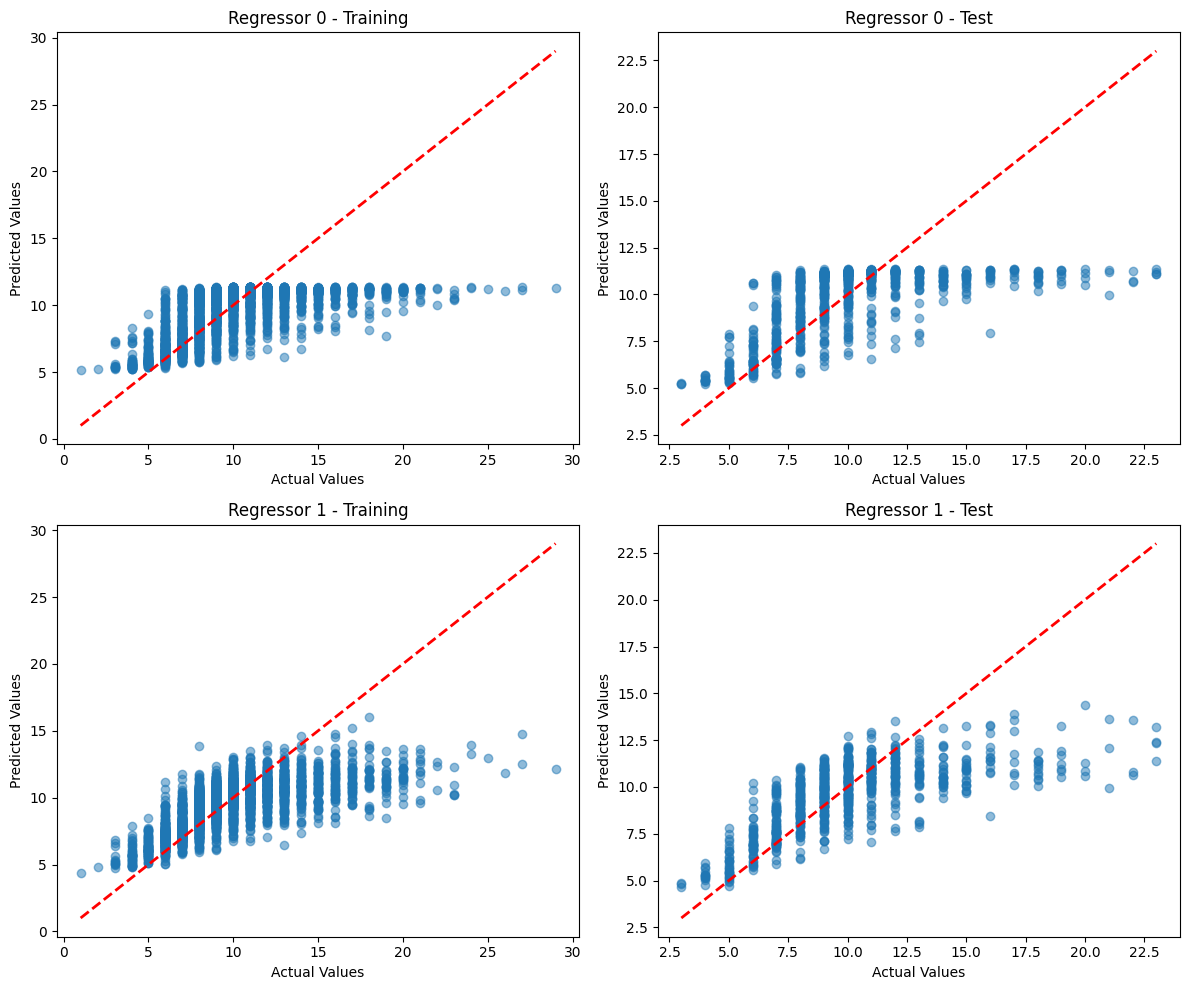

In [73]:
def plot_actual_vs_predicted2(actual, predicted, set_name, ax):
    ax.scatter(actual, predicted, alpha=0.5)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{set_name}")

models = {
    "Regressor 0": regressor0,
    "Regressor 1": regressor1
}

predictions = {
    model_name: {
        "train": model.predict(trainval_features),
        "test": model.predict(test_features)
    }
    for model_name, model in models.items()
}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for idx, (model_name, preds) in enumerate(predictions.items()):
    plot_actual_vs_predicted2(trainval_targets, preds["train"], f"{model_name} - Training", axs[idx, 0])
    plot_actual_vs_predicted2(test_targets, preds["test"], f"{model_name} - Test", axs[idx, 1])

plt.tight_layout()
plt.show()


# Comparison between the NN and the supervised learning

Based of the results of the two ways to train models, the supervised learning is has produced the best results. 

# Overall 

Due to the lack of time, there is not more explored tweaks, explanation and tons of discussion to the overall project. There would be interesting to try pipelines and see the different results with different pre processing methods. 